# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [1]:
#Leyendo los datos
import pandas as pd

datos = pd.read_csv('./precios_casas.csv')
datos.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [2]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [3]:
#remover variable irrelevante
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Contexto de los datos

- area_primer_piso: Se refiere al área del primer piso de la propiedad, medida en metros cuadrados.

- existe_segundo_piso: Esta variable es binaria, indicando si la propiedad tiene o no un segundo piso. Puede ser representada como 1 para "sí" y 0 para "no".

- area_segundo_piso: Si la propiedad tiene un segundo piso, esta variable representa el área total del segundo piso, medida en metros cuadrados.

- cantidad_baños: Indica el número total de baños en la propiedad.

- capacidad_coches_garaje: Esta variable indica la capacidad del garaje de la propiedad, es decir, el número máximo de coches que pueden estacionarse en el garaje.

- calidad_de_la_cocina_Excelente: Esta es una variable categórica que evalúa la calidad de la cocina en la propiedad. En este caso, se asume que si la cocina es considerada "Excelente" se representa por 1, y de lo contrario, por 0.

- precio_de_venta: Este es el precio de venta de la propiedad en reales. Es la variable objetivo que se intenta predecir utilizando los otros atributos de la propiedad.

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  

In [4]:
# Correlación
corr = datos.corr()

In [5]:
corr['precio_de_venta']

area_primer_piso               0.616557
tiene_segundo_piso             0.138541
area_segundo_piso              0.305311
cantidad_banos                 0.563132
capacidad_carros_garage        0.640214
calidad_de_cocina_excelente    0.496223
precio_de_venta                1.000000
Name: precio_de_venta, dtype: float64

In [6]:
# Cuáles factores están más correlacionados?

Segun la correlacion de Pearson las variables que estan mas correlacionadas con _precio_de_ventas_ son: _area_primer_piso_, _capacidad_carros_garage_ y _cantidad_banos_.

## Visualizacion de la Correlacion

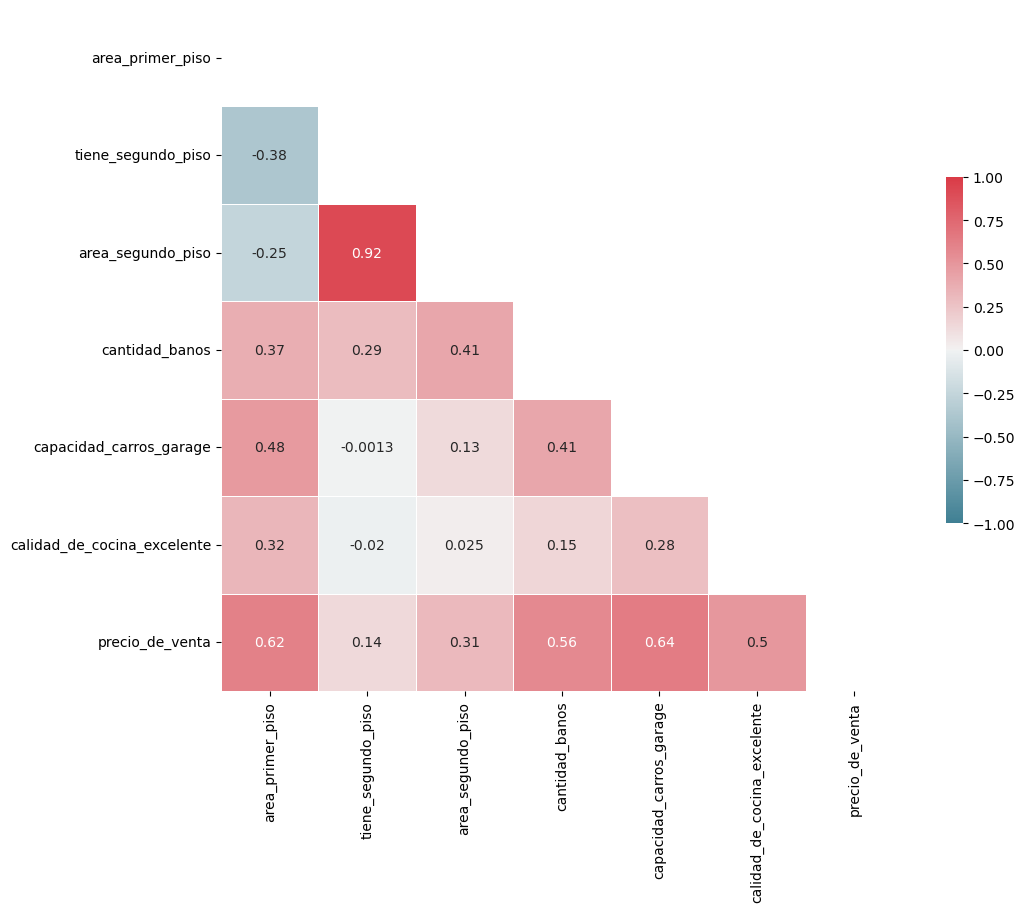

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# generamos una mascara para el triangulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# configurar grafico
f, ax = plt.subplots(figsize=(11,9))

# generar mapa de calor
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr, 
    mask=mascara, 
    cmap=cmap, vmax=1, 
    vmin=-1, 
    center=0, 
    square=True, 
    linewidths=0.5, 
    annot=True, 
    cbar_kws={'shrink': 0.5}
)

plt.show()

> La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en el garaje aumenta, el área del primer piso de la casa tiende a aumentar también.

> Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.

> Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa.

## Relacionando variables

In [8]:
# importando los paquetes para la visualización
import plotly.express as px

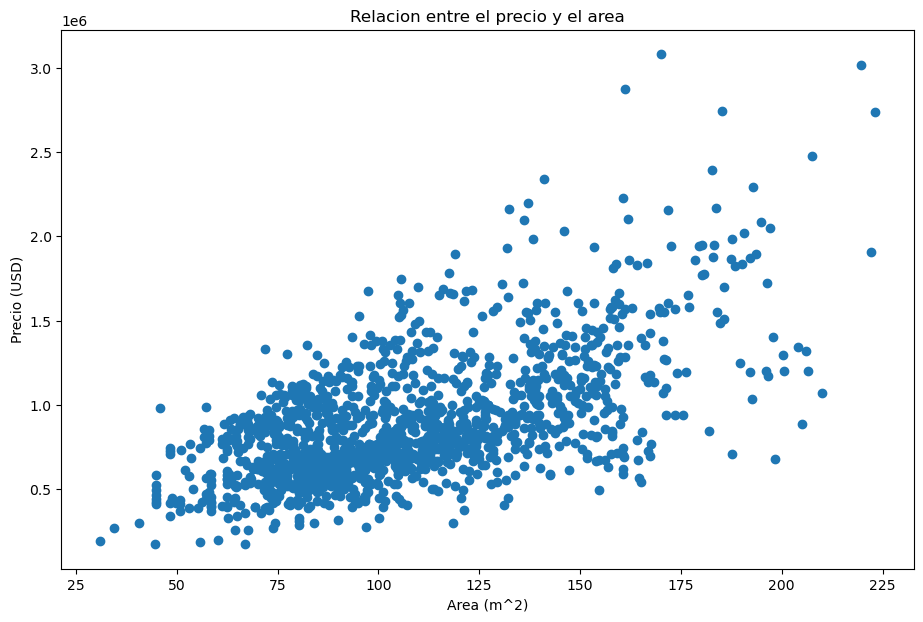

In [9]:
# Cómo se relacionan el área construída y el precio del inmueble?

f, ax = plt.subplots(figsize=(11,7))
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title('Relacion entre el precio y el area')
plt.xlabel('Area (m^2)')
plt.ylabel('Precio (USD)')
plt.show()

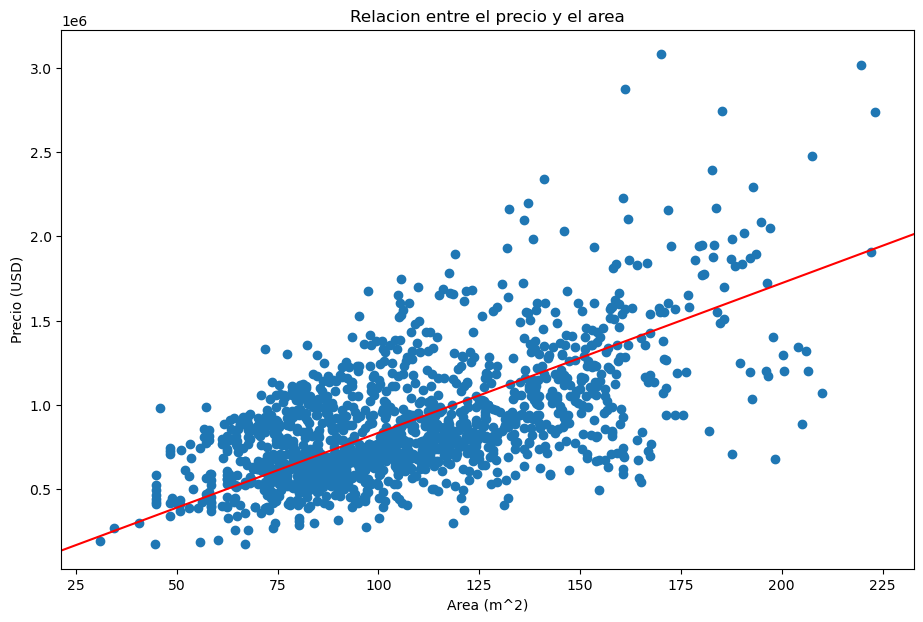

In [10]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# Y si quisieramos trazar una línea que nos permita describir este comportamiento?
f, ax = plt.subplots(figsize=(11,7))
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40,300000), xy2=(175,1500000), color='red')
plt.title('Relacion entre el precio y el area')
plt.xlabel('Area (m^2)')
plt.ylabel('Precio (USD)')
plt.show()

## Mejor recta

In [11]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')

> El grafico muestra la mejor recta que se ajusta a los datos minimizando el error entre los datos reales y las predicciones. 

# 2. Explicando la recta

Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

/tmp/ipykernel_18220/450109937.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




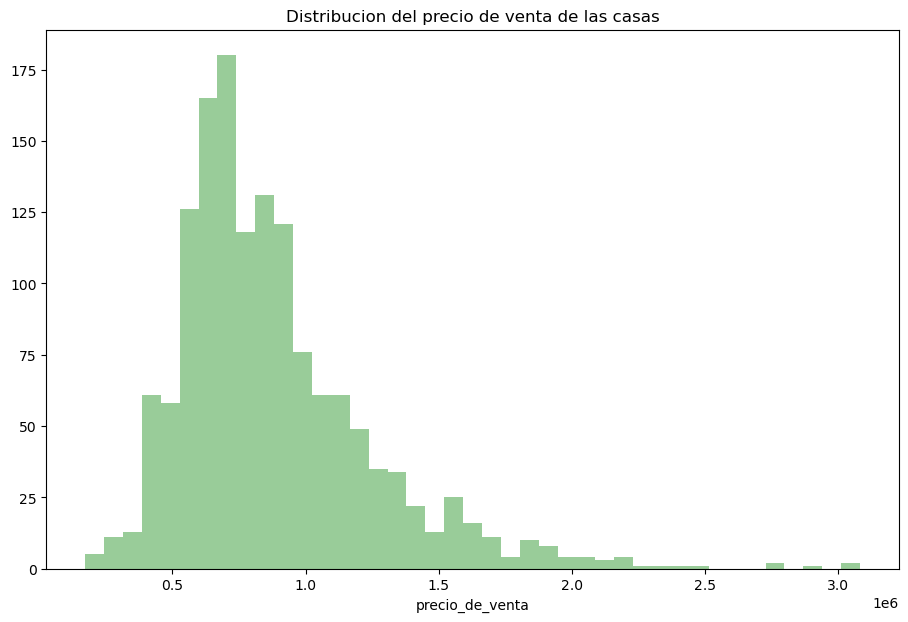

In [12]:
#Quién es nuestra variable de respuesta?
f, ax = plt.subplots(figsize=(11,7))
sns.distplot(datos['precio_de_venta'], kde=False, color='green')
plt.title('Distribucion del precio de venta de las casas')
plt.show()

> Los precios de venta de las casas tienen una mayor concentracion alrededor de los 700 mil dolares.

> Los precios que oscilan entre 2.5 y 3 millones de dolares son atipicos.

> La mayor parte de los precios se encuentran entre los 400 mil y 1 millon 200 mil de dolares

> EL ajuste lineal se va a enfocar en los precios alrededor de 700 mil dolares

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

# division de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [14]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [15]:
# import ols
from statsmodels.formula.api import ols

In [16]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)

In [17]:
# visualizando los parámetros
modelo_0.params

Intercept           152909.288334
area_primer_piso      6793.641641
dtype: float64

In [18]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        12:12:38   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $152.909,28. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.793,64. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.793,64.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [54]:
# observando el R²
round(modelo_0.rsquared, 2)

0.38

> El modelo logra ajustarse a los datos en un 37% utilizando unicamente el area del primer piso. Es decir, el area del primer piso explica el 37% de la variacion del precio de la casa

> Hay un 62% aproximadamente del precio de la casa que no esta siendo explicado por la variacion del area del primer piso.

## Entendiendo el resíduo

In [47]:
# Quiénes son los residuos?
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

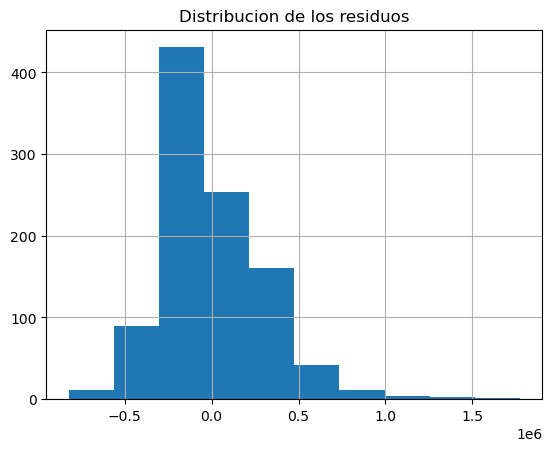

In [48]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribucion de los residuos')
plt.show()

> La grafica muestra que la mayoria de los residuos oscilan entre -0.5 y 0.5 (unidades de millones) 

> Hay mas de 400 inmuebles con residuo negativo de aproximadamente 300 mil dolares. Esto indica que estos inmuebles cuestan mas cuando en realidad estos inmuebles cuestan 300 mil menos.

> Alrededor de 250 inmuebles presentan un residuo muy bajo cercano a cero.

> Lo ideal es que la mayoria de los datos se encuentren alrededor de cero con una variabilidad muy baja en ambos lados.

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [49]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [ ]:
# importando el r2_score
from sklearn.metrics import r2_score

# mostrando el resultado de r²
print(f'Coeficiente de determinacion R^2 con los datos de prueba: {round(r2_score(y_test, y_predict),2)}')

Coeficiente de determinacion R^2 con los datos de prueba: 0.39


> El coeficiente de determinacion para datos de entrenamiento y de prueba son muy cercanos (0.38 y 0.39 respectivamente). Esto quiere decir que nuestro modelo generado por una variable independiente, generaliza bien pero no explica del todo la variacion del precio.

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

OptionError: No such keys(s): 'mode.use_inf_as_null'

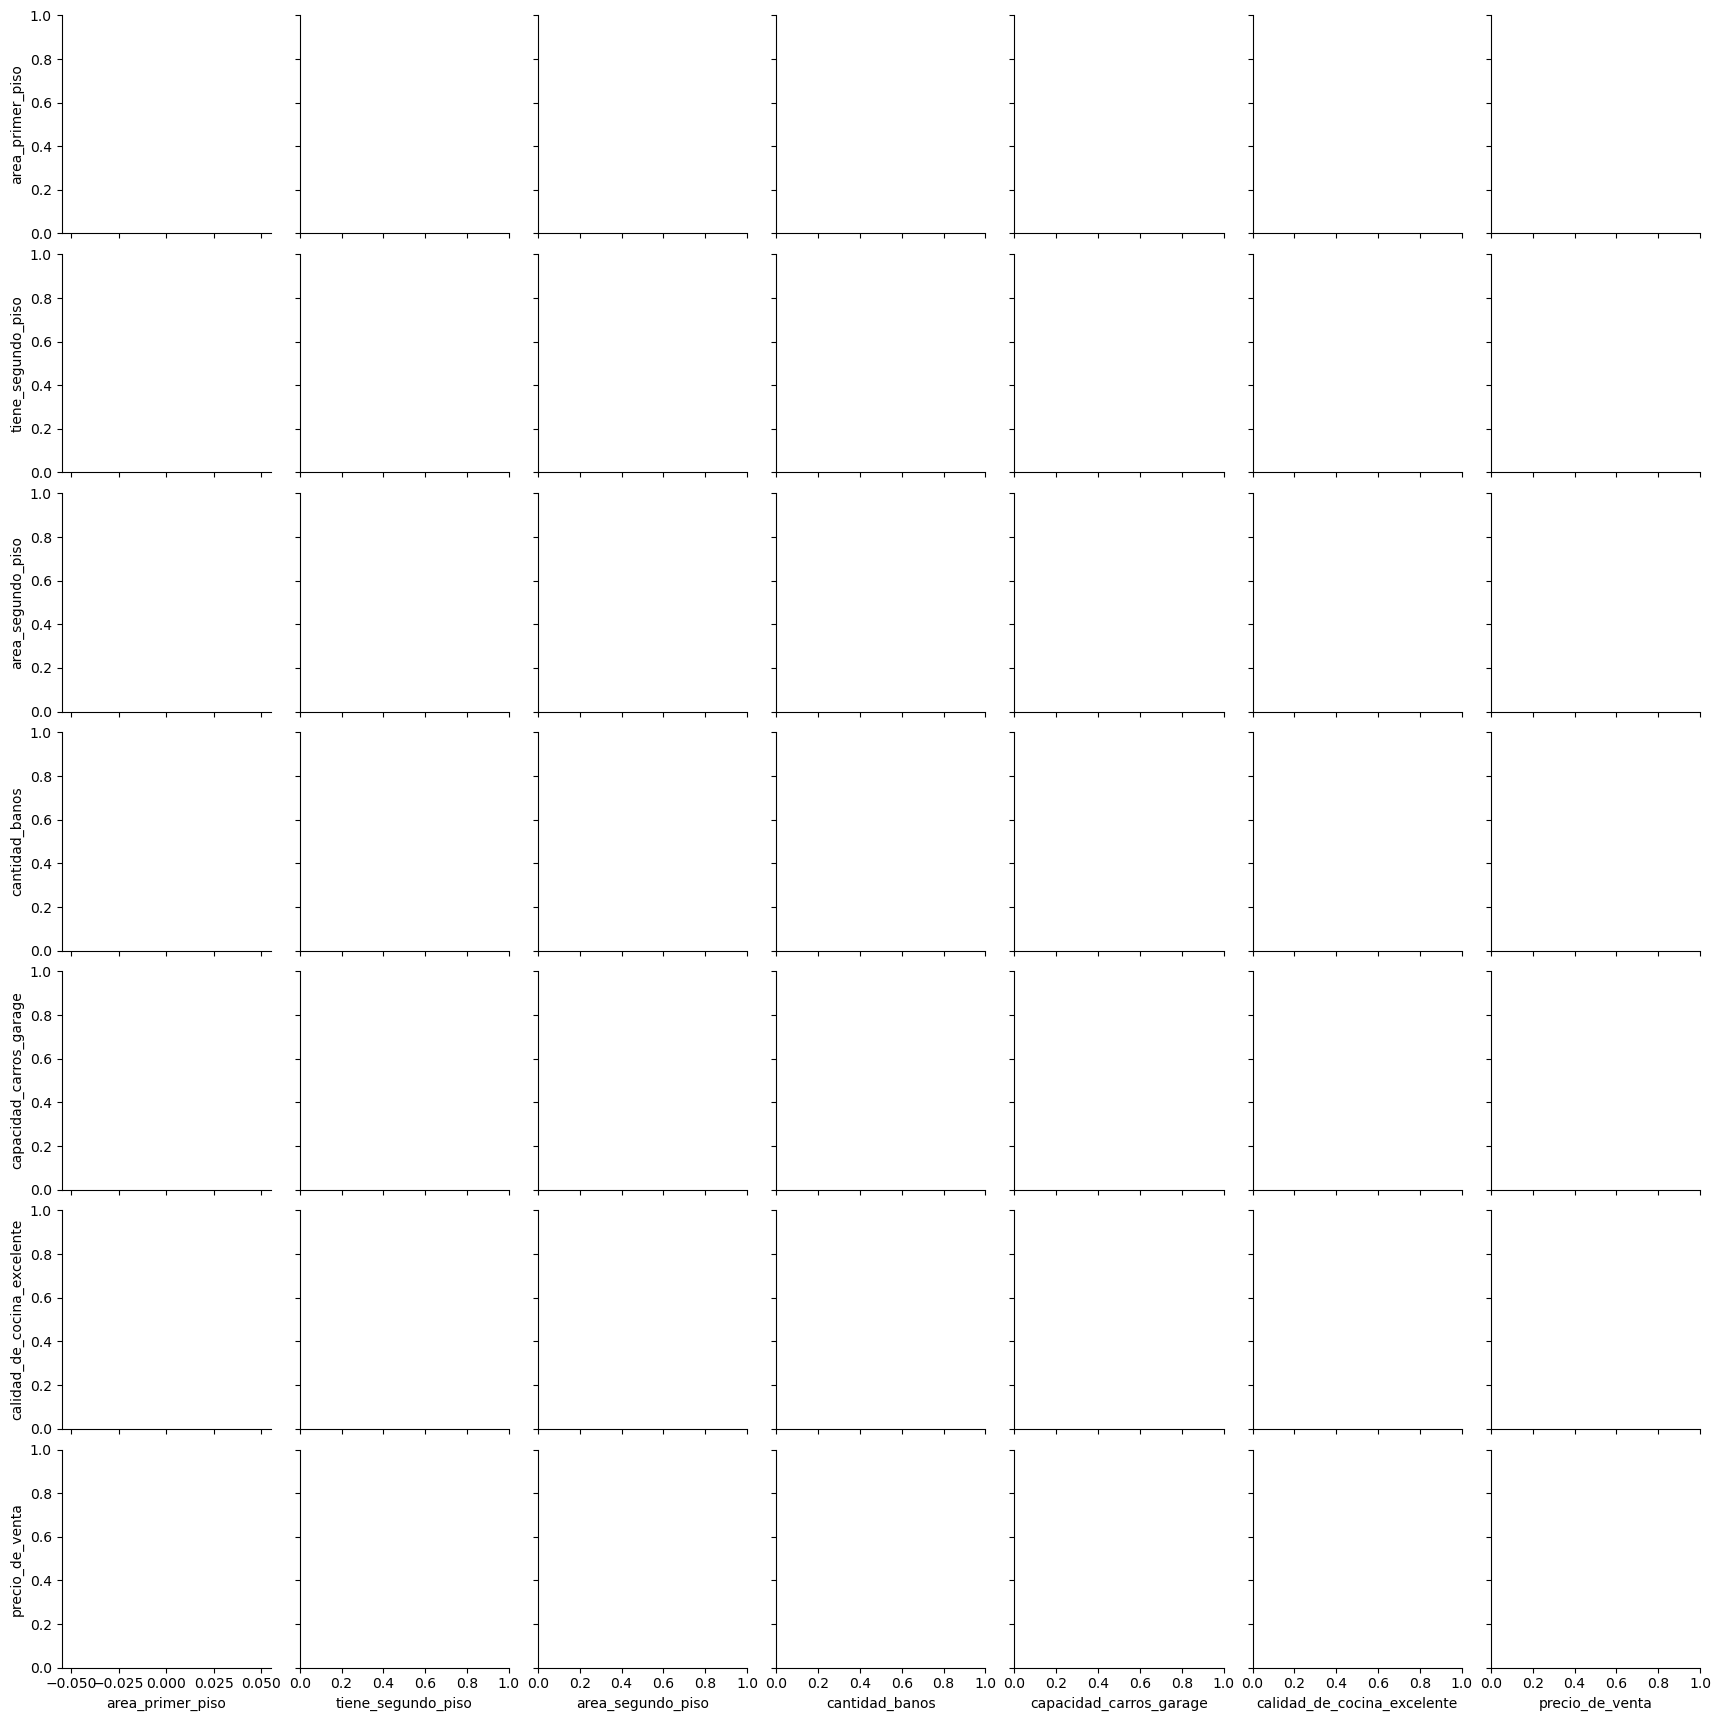

In [55]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)

In [26]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [27]:
# importando la api de statsmodels


In [28]:
# Añadiendo una constante


In [29]:
# Creando el modelo de regresión (con todas las variables): saturado


In [30]:
# Modelo sin el área del segundo piso


In [31]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [32]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [33]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [34]:
# Añadiendo una constante en X_test


In [35]:
# Previsión con el modelo 3


In [36]:
# Cuál es el r² de la previsión?


In [37]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [38]:
#Nuevo inmueble


In [39]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [40]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [41]:
# Leyendo varias casas?


In [42]:
# Añadiendo una constante


In [43]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [44]:
# importar el VIF de statsmodel


In [45]:
# VIF 1


In [46]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">